In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Đọc dữ liệu từ file CSV vào DataFrame
data = pd.read_csv('wdi_final.csv')

In [3]:
# Xác định các biến quan tâm
interested_vars = ['Population, total', 'Gross capital formation (% of GDP)', 'Inflation, consumer prices (annual %)', 
                   'Trade (% of GDP)', 'Unemployment, total (% of total labor force) (national estimate)', 
                   'Labor force, total', 'Foreign direct investment, net inflows (% of GDP)', 'GDP (current US$)']

In [4]:
# Lọc dữ liệu cho quốc gia Vietnam
df_vietnam = data[data['country_name'] == 'Vietnam']

In [5]:
# Chuẩn bị dữ liệu cho hồi quy
df = df_vietnam[df_vietnam['series_name'].isin(interested_vars)].pivot(index='year', columns='series_name', values='value').reset_index()

# Xóa các dòng có giá trị thiếu
df.dropna(inplace=True)

# Hồi quy tuyến tính cho từng series
for series in interested_vars[:-1]:  # Loại bỏ 'GDP (current US$)' khỏi danh sách
    X = df[series]  # Biến độc lập
    y = df['GDP (current US$)']  # Biến phụ thuộc

    # Thêm hạng mục hằng số vào X
    X = sm.add_constant(X)

    # Tạo mô hình hồi quy tuyến tính
    model = sm.OLS(y, X)

    # Fit mô hình
    results = model.fit()

    # In kết quả
    print(f"Series: {series}")
    print(results.summary())
    print("\n")

Series: Population, total
                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     362.5
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.00e-14
Time:                        00:32:09   Log-Likelihood:                -585.82
No. Observations:                  23   AIC:                             1176.
Df Residuals:                      21   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const       

## Nhận xét:

1. **Series: Population, total**
   - R-squared (R2) = 0.945: Mô hình có khả năng giải thích 94.5% sự biến đổi của GDP (current US$) dựa trên Population, total.
   - Hệ số (coefficient) của Population, total là 1.644e+04: Khi giá trị Population, total tăng 1 đơn vị, dự đoán GDP (current US$) tăng 1.644e+04 đơn vị.
   - Giá trị p-Value cho Population, total = 0.000: Có đủ bằng chứng để bác bỏ giả thuyết không có tương quan và Population, total có tương quan đáng kể với GDP (current US$).

2. **Series: Gross capital formation (% of GDP)**
   - R-squared (R2) = 0.004: Mô hình chỉ có khả năng giải thích 0.4% sự biến đổi của GDP (current US$) dựa trên Gross capital formation (% of GDP).
   - Hệ số (coefficient) của Gross capital formation (% of GDP) là 2.524e+09: Tuy nhiên, giá trị p-Value cao (0.773) không cho thấy có sự tương quan đáng kể giữa Gross capital formation (% of GDP) và GDP (current US$).

3. **Series: Inflation, consumer prices (annual %)**
   - R-squared (R2) = 0.006: Mô hình chỉ có khả năng giải thích 0.6% sự biến đổi của GDP (current US$) dựa trên Inflation, consumer prices (annual %).
   - Hệ số (coefficient) của Inflation, consumer prices (annual %) là -2.279e+09: Tuy nhiên, giá trị p-Value cao (0.724) không cho thấy có sự tương quan đáng kể giữa Inflation, consumer prices (annual %) và GDP (current US$).

4. **Series: Trade (% of GDP)**
   - R-squared (R2) = 0.721: Mô hình có khả năng giải thích 72.1% sự biến đổi của GDP (current US$) dựa trên Trade (% of GDP).
   - Hệ số (coefficient) của Trade (% of GDP) là 4.043e+09: Khi Trade (% of GDP) tăng 1 đơn vị, dự đoán GDP (current US$) tăng 4.043e+09 đơn vị.
   - Giá trị p-Value cho Trade (% of GDP) = 0.000: Có đủ bằng chứng để bác bỏ giả thuyết không có tương quan và Trade (% of GDP) có tương quan đáng kể với GDP (current US$).

5. **Series: Unemployment, total (% of total labor force) (national estimate)**
   - R-squared (R2) = 0.198: Mô hình có khả năng giải thích 19.8% sự biến đổi của GDP (current US$) dựa trên Unemployment, total (% of total labor force) (national estimate).
   - Hệ số (coefficient) của Unemployment, total (% of total labor force) (national estimate) là -1.019e+11: Khi Unemployment, total (% of total labor force) (national estimate) tăng 1 đơn vị, dự đoán GDP (current US$) giảm 1.019e+11 đơn vị.
   - Giá trị p-Value cho Unemployment, total (% of total labor force) (national estimate) = 0.033: Có đủ bằng chứng để bác bỏ giả thuyết không có tương quan và Unemployment, total (% of total labor force) (national estimate) có tương quan đáng kể với GDP (current US$).

6. **Series: Labor force, total**
   - R-squared (R2) = 0.876: Mô hình có khả năng giải thích 87.6% sự biến đổi của GDP (current US$) dựa trên Labor force, total.
   - Hệ số (coefficient) của Labor force, total là 1.602e+04: Khi giá trị Labor force, total tăng 1 đơn vị, dự đoán GDP (current US$) tăng 1.602e+04 đơn vị.
   - Giá trị p-Value cho Labor force, total = 0.000: Có đủ bằng chứng để bác bỏ giả thuyết không có tương quan và Labor force, total có tương quan đáng kể với GDP (current US$).

7. **Series: Foreign direct investment, net inflows (% of GDP)**
   - R-squared (R2) = 0.092: Mô hình chỉ có khả năng giải thích 9.2% sự biến đổi của GDP (current US$) dựa trên Foreign direct investment, net inflows (% of GDP).
   - Hệ số (coefficient) của Foreign direct investment, net inflows (% of GDP) là -2.203e+10: Tuy nhiên, giá trị p-Value không thấp (0.160), cho thấy không có sự tương quan đáng kể giữa Foreign direct investment, net inflows (% of GDP) và GDP (current US$).

Tổng kết lại chúng ta có các series có tương quan đáng kể với `GDP (current US$)` như: `Population, total`, `Trade (% of GDP)`, `Unemployment, total (% of total labor force) (national estimate)` và `Labor force, total`. Các series khác như `Gross capital formation (% of GDP)`, `Inflation, consumer prices (annual %)`, và `Foreign direct investment, net inflows (% of GDP)` có tương quan yếu hoặc không đáng kể với `GDP (current US$)`.

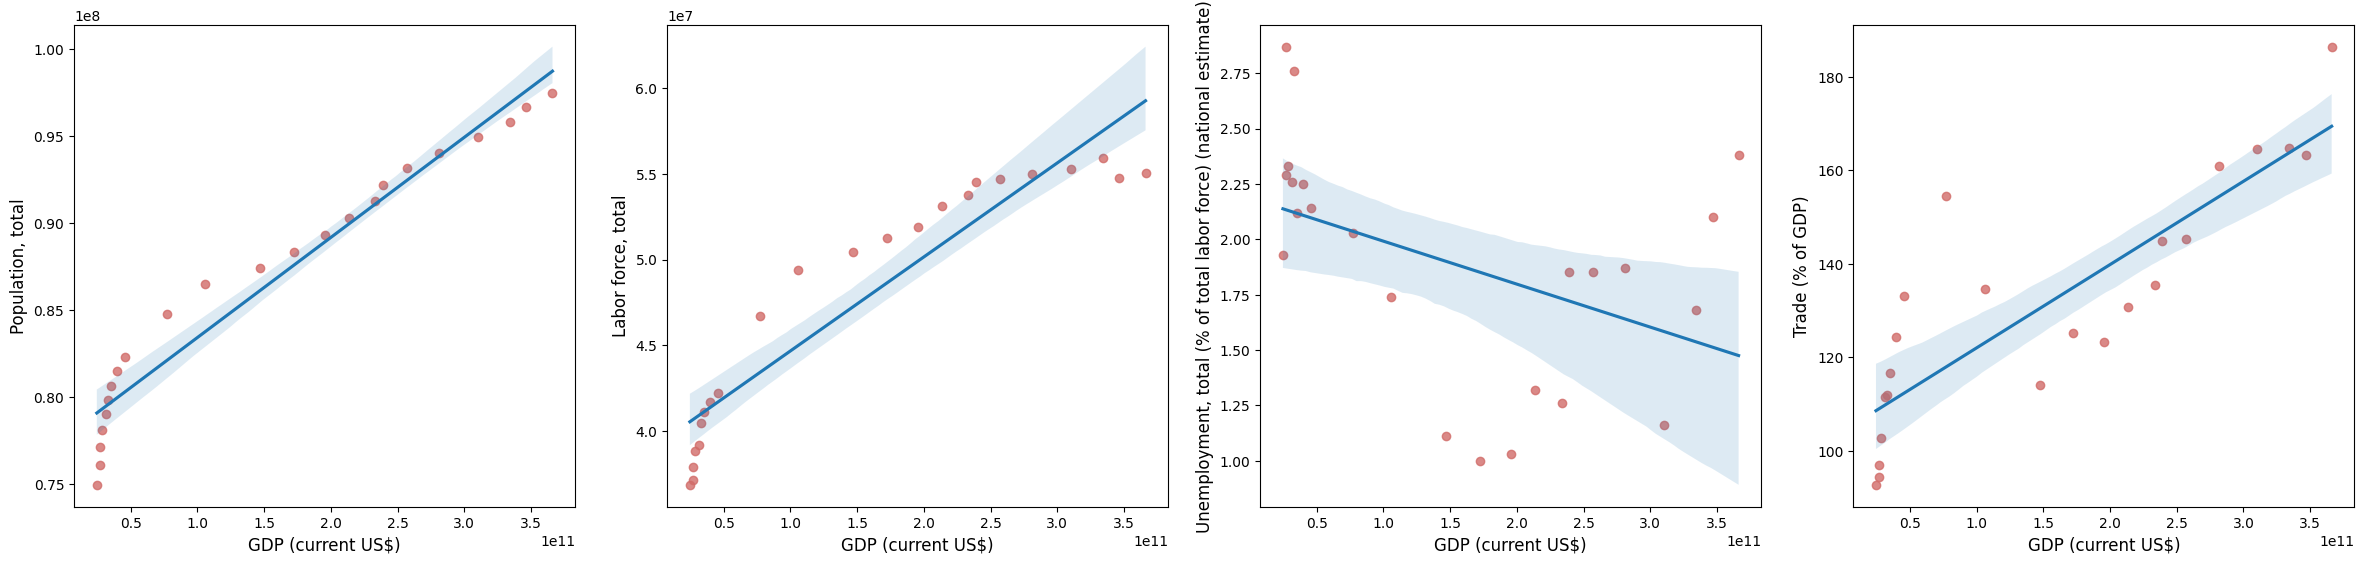

In [14]:
# Chỉ lấy các biến có ảnh hưởng
quant_vars = ['Population, total', 'Labor force, total', 'Unemployment, total (% of total labor force) (national estimate)', 'Trade (% of GDP)']

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Vẽ hồi quy tuyến tính cho GDP và các biến có ảnh hưởng
for i, var in enumerate(quant_vars):
    sns.regplot(data=df, x='GDP (current US$)', y=var, ax=axes[i], scatter_kws={'alpha': 0.8, 'color': '#d16c69'})
    axes[i].set_xlabel('GDP (current US$)',fontsize=12)
    axes[i].set_ylabel(var,fontsize=12)

plt.tight_layout(pad=2)
plt.show()